# Analysing the trends in criminal activities by men and women over the years 

### Basic Initialization

In [6]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/courts-dataset/csv/judges/judges_clean.csv
/kaggle/input/courts-dataset/csv/acts/acts_sections.csv
/kaggle/input/courts-dataset/csv/cases/cases_2015.csv
/kaggle/input/courts-dataset/csv/cases/cases_2012.csv
/kaggle/input/courts-dataset/csv/cases/cases_2018.csv
/kaggle/input/courts-dataset/csv/cases/cases_2013.csv
/kaggle/input/courts-dataset/csv/cases/cases_2017.csv
/kaggle/input/courts-dataset/csv/cases/cases_2010.csv
/kaggle/input/courts-dataset/csv/cases/cases_2014.csv
/kaggle/input/courts-dataset/csv/cases/cases_2016.csv
/kaggle/input/courts-dataset/csv/cases/cases_2011.csv
/kaggle/input/courts-dataset/csv/keys/type_name_key.csv
/kaggle/input/courts-dataset/csv/keys/cases_district_key.csv
/kaggle/input/courts-dataset/csv/keys/act_key.csv
/kaggle/input/courts-dataset/csv/keys/disp_name_key.csv
/kaggle/input/courts-dataset/csv/keys/purpose_name_key.csv
/kaggle/input/courts-dataset/csv/keys/cases_state_key.csv
/kaggle/input/courts-dataset/csv/keys/section_key.csv
/kaggle

### Breaking down the data into smaller chunks - according to gender and year 

In [7]:
# helpers to loop and name things properly
name = '/kaggle/input/courts-dataset/csv/cases/cases_201'
helper = 'cases_201'

# looping over all the years 
for i in range(9):
    # creating the name formatters
    year = name + str(i) + '.csv'
    help = helper + str(i)
    
    # checking if the dataset is loaded properly
    df = pd.read_csv(year)
    df.head()
    
    # creating the smaller chunks of csv files for better analysis later
    print(help)
    
    # cases where the defendant was a woman
    chunk = df.loc[(df['female_defendant'] == '1 female')]
    print(chunk.shape)
    naming = help + '_fem_crim.csv'
    chunk.to_csv(naming)
    
    # cases where the defendant was a man
    chunk = df.loc[(df['female_defendant'] == '0 male')]
    print(chunk.shape)
    naming = help + '_male_crim.csv'
    chunk.to_csv(naming)

cases_2010
(527450, 19)
(2922614, 19)
cases_2011
(656980, 19)
(3527228, 19)
cases_2012
(818280, 19)
(4347949, 19)
cases_2013
(955045, 19)
(5093489, 19)
cases_2014
(1102727, 19)
(5891828, 19)
cases_2015
(1229327, 19)
(7004946, 19)
cases_2016
(1322363, 19)
(7555397, 19)
cases_2017
(1470284, 19)
(8711780, 19)
cases_2018
(1503361, 19)
(9069681, 19)


## Number of cases

### Finding statewise and yearwise criminal cases by women

In [8]:
name = '/kaggle/working/cases_201'
year = 2010

# initializing the matrix 
femcases = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    femcases.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '_fem_crim.csv'
    
    df = pd.read_csv(file)
    femcases[0][i] = df.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j)]
        #print(temp.shape[0])
        femcases[j][i] = temp.shape[0]

print(femcases)

[[527450, 656980, 818280, 955045, 1102727, 1229327, 1322363, 1470284, 1503361], [85452, 83395, 96918, 96880, 103573, 107588, 111679, 119628, 120945], [40472, 52866, 61171, 66502, 86036, 95597, 97262, 110573, 113341], [76277, 92336, 107579, 130776, 152046, 151603, 149986, 161774, 166293], [27321, 30045, 40948, 50969, 63047, 70462, 78902, 78438, 69165], [3065, 4816, 6631, 7305, 9158, 12174, 11382, 15594, 34104], [5235, 8129, 10415, 13642, 14671, 18600, 19419, 25189, 22333], [4149, 4949, 7094, 8332, 9934, 11695, 11411, 14624, 22142], [11475, 15514, 20720, 27748, 31725, 30447, 31862, 35310, 44367], [15619, 20159, 27144, 33173, 32650, 49141, 44139, 54235, 50363], [30048, 39402, 46168, 56562, 66657, 74552, 79664, 97603, 103777], [13876, 17591, 22059, 26856, 28773, 33118, 38137, 48195, 42134], [976, 1948, 2632, 2846, 2703, 3832, 3939, 7325, 9079], [59573, 84661, 110897, 122179, 138018, 171348, 207863, 235969, 230976], [10509, 17767, 23457, 28564, 36323, 41373, 42445, 44842, 50876], [2522, 382

### Finding statewise and yearwise criminal cases by men

In [9]:
name = '/kaggle/working/cases_201'
year = 2010

# initializing the matrix 
mencases = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    mencases.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '_male_crim.csv'
    
    df = pd.read_csv(file)
    mencases[0][i] = df.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j)]
        # print(temp.shape[0])
        mencases[j][i] = temp.shape[0]

print(mencases)

[[2922614, 3527228, 4347949, 5093489, 5891828, 7004946, 7555397, 8711780, 9069681], [600327, 604231, 666803, 727791, 757576, 854216, 844838, 878258, 909318], [58650, 75620, 84429, 93012, 115218, 124992, 125605, 141863, 146102], [283999, 342403, 410354, 524723, 587856, 607142, 607624, 642339, 645959], [147916, 162329, 235668, 287335, 402288, 501343, 595659, 589797, 519346], [21709, 32378, 43359, 47525, 58763, 76948, 73248, 93984, 193797], [35368, 53075, 64106, 79524, 93420, 112862, 112721, 150297, 144579], [34189, 42026, 53537, 59925, 71176, 81363, 75961, 99097, 130976], [113381, 139430, 172767, 215836, 237123, 241427, 238794, 291480, 360975], [149259, 195447, 251588, 328146, 331299, 426166, 403027, 644412, 604806], [101119, 132045, 161620, 194491, 236458, 274445, 308294, 381217, 407924], [59302, 71470, 86824, 109360, 108261, 125157, 146174, 199053, 167539], [10034, 18210, 22065, 20805, 22738, 37905, 31381, 47797, 58600], [439886, 566837, 707625, 715402, 816657, 1254730, 1468516, 168618

### Finding the total number of cases that took place for each state and year

In [10]:
name = '/kaggle/input/courts-dataset/csv/cases/cases_201'
year = 2010

# initializing the matrix 
totcases = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    totcases.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '.csv'
    
    df = pd.read_csv(file)
    totcases[0][i] = df.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j)]
        # print(temp.shape[0])
        totcases[j][i] = temp.shape[0]

print(totcases)

[[4281327, 5208653, 6400783, 7555617, 8874616, 10475876, 11349260, 13065513, 13724299], [866279, 870832, 965560, 1039581, 1114737, 1259036, 1253768, 1314965, 1374670], [119359, 158237, 180811, 195473, 246828, 269049, 273082, 309346, 317917], [507691, 627571, 724072, 896535, 1029441, 1063633, 1074358, 1100310, 1101515], [217526, 237080, 335315, 409259, 557128, 683450, 809819, 806106, 705613], [28541, 44381, 62039, 69771, 88507, 120239, 110985, 146048, 315195], [47906, 72233, 91339, 111690, 131610, 155744, 155943, 214503, 212765], [42990, 56304, 76004, 87633, 107528, 136885, 130751, 175810, 275310], [140198, 172378, 217541, 286735, 355055, 378305, 389051, 479259, 612675], [190334, 251013, 330951, 437010, 447139, 585688, 559176, 913171, 865734], [170958, 221802, 268919, 327097, 401418, 461290, 505604, 624243, 658724], [83523, 102265, 126070, 159041, 164049, 192927, 229001, 299934, 256311], [12457, 23164, 28960, 27459, 29587, 50341, 42756, 67300, 86291], [576840, 763701, 961480, 1004559, 1

## Percentage values 

### Finding the % of crimes committed by women for each of the states and years

In [11]:
percentwomen = []

for i in range(34):
    statewise = []
    for j in range(9):
        if totcases[i][j] != 0:
            percent = (femcases[i][j] / totcases[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    percentwomen.append(statewise) 

print(percentwomen)

[[12.31977842383915, 12.613241849668237, 12.784060950043145, 12.640198676031355, 12.425630585030383, 11.734837258478432, 11.651534989946482, 11.25316702069027, 10.954009381462763], [9.864258512557733, 9.576473992687452, 10.037491196818426, 9.319139153178059, 9.291249864317772, 8.545267966920724, 8.907469324468323, 9.097428448665934, 8.798111546771226], [33.90779078242947, 33.40937960148385, 33.83145936917555, 34.0210668481069, 34.856661318813096, 35.531445944790725, 35.616408258325336, 35.74411823653772, 35.65112906827883], [15.024296274702525, 14.713235633896405, 14.857500359080312, 14.586825946560927, 14.769763395862414, 14.253318578870719, 13.96052340095201, 14.702583817287856, 15.096753108219135], [12.559877899653374, 12.672937405095327, 12.211800843982525, 12.453971690298808, 11.316429976594247, 10.309751993562074, 9.74316483065969, 9.730482095406808, 9.802115323838988], [10.738936967870782, 10.851490502692593, 10.688437918083785, 10.469966031732381, 10.347204175940886, 10.1248347

### Finding the % of crimes committed by men for each of the states and years

In [12]:
percentmen = []

for i in range(34):
    statewise = []
    for j in range(9):
        if totcases[i][j] != 0:
            percent = (mencases[i][j] / totcases[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    percentmen.append(statewise)

print(percentmen)

[[68.2642087371509, 67.71862130189898, 67.92839251072877, 67.41327677144038, 66.38966688812225, 66.8674008741608, 66.5717148078377, 66.67767274044272, 66.0848397429989], [69.2994981986173, 69.38548422657873, 69.05868097269978, 70.0081090362367, 67.9600659168934, 67.84682884365498, 67.3839179178285, 66.78945827455483, 66.14809372431202], [49.137476017728034, 47.78907587985111, 46.69461481878868, 47.583042159275195, 46.679469103991444, 46.4569650881438, 45.99534205842934, 45.859005773470486, 45.95601996747579], [55.93934105587848, 54.56004181200215, 56.673093283540865, 58.52788792406321, 57.104389663904975, 57.081907011158926, 56.55693912085171, 58.37800256291409, 58.64277835526524], [67.99922767853039, 68.47013666272989, 70.28257012063284, 70.20859651223309, 72.20746399391163, 73.35474431194675, 73.5545844194814, 73.16618409985783, 73.60210200208897], [76.06250656949652, 72.95464275252922, 69.88990796112124, 68.11569276633558, 66.39361858384083, 63.99587488252564, 65.99810785241249, 64.

## Percentage values - without the unclear ones

### Finding the new total number of cases

In [13]:
newtot = []

for i in range(34):
    statewise = []
    for j in range(9):
        temp = femcases[i][j] + mencases[i][j]
        statewise.append(temp)
    newtot.append(statewise)

print(newtot)

[[3450064, 4184208, 5166229, 6048534, 6994555, 8234273, 8877760, 10182064, 10573042], [685779, 687626, 763721, 824671, 861149, 961804, 956517, 997886, 1030263], [99122, 128486, 145600, 159514, 201254, 220589, 222867, 252436, 259443], [360276, 434739, 517933, 655499, 739902, 758745, 757610, 804113, 812252], [175237, 192374, 276616, 338304, 465335, 571805, 674561, 668235, 588511], [24774, 37194, 49990, 54830, 67921, 89122, 84630, 109578, 227901], [40603, 61204, 74521, 93166, 108091, 131462, 132140, 175486, 166912], [38338, 46975, 60631, 68257, 81110, 93058, 87372, 113721, 153118], [124856, 154944, 193487, 243584, 268848, 271874, 270656, 326790, 405342], [164878, 215606, 278732, 361319, 363949, 475307, 447166, 698647, 655169], [131167, 171447, 207788, 251053, 303115, 348997, 387958, 478820, 511701], [73178, 89061, 108883, 136216, 137034, 158275, 184311, 247248, 209673], [11010, 20158, 24697, 23651, 25441, 41737, 35320, 55122, 67679], [499459, 651498, 818522, 837581, 954675, 1426078, 16763

### Finding the new percentage of cases by women

In [14]:
newpercentwomen = []

for i in range(34):
    statewise = []
    for j in range(9):
        if newtot[i][j] != 0:
            percent = (femcases[i][j] / newtot[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    newpercentwomen.append(statewise) 

print(newpercentwomen)

[[15.288122191356452, 15.701418285133053, 15.83901913755662, 15.78969383324951, 15.765506168726958, 14.929393280985462, 14.895232581191653, 14.439940664289677, 14.218812334236446], [12.460574033325605, 12.127959094042401, 12.690236355946741, 11.74771514943535, 12.02730305673002, 11.186062856881444, 11.675589665421523, 11.98814293416282, 11.73923551559165], [40.8304917172777, 41.145338791774975, 42.01304945054945, 41.69038454304951, 42.74995776481461, 43.33715643119104, 43.6412748410487, 43.802389516550726, 43.68628176516614], [21.17182382395719, 21.23941031285438, 20.77083329310934, 19.950602518081645, 20.549478174136578, 19.98075769856803, 19.79725716397619, 20.118316704244304, 20.473079783121495], [15.590885486512551, 15.618014908459562, 14.803192873875698, 15.066035281876655, 13.548733707973826, 12.322732400031478, 11.696792432411598, 11.738086152326652, 11.752541583759692], [12.37184144667797, 12.948324998655696, 13.264652930586118, 13.32299835856283, 13.48331149423595, 13.65992684

### Finding the new percentage of cases by men

In [15]:
newpercentmen = []

for i in range(34):
    statewise = []
    for j in range(9):
        if newtot[i][j] != 0:
            percent = (mencases[i][j] / newtot[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    newpercentmen.append(statewise)

print(newpercentmen)

[[84.71187780864355, 84.29858171486696, 84.16098086244338, 84.2103061667505, 84.23449383127304, 85.07060671901453, 85.10476741880835, 85.56005933571032, 85.78118766576355], [87.5394259666744, 87.87204090595759, 87.30976364405326, 88.25228485056465, 87.97269694326998, 88.81393714311857, 88.32441033457847, 88.01185706583719, 88.26076448440836], [59.169508282722305, 58.854661208225025, 57.98695054945055, 58.30961545695049, 57.25004223518538, 56.66284356880896, 56.35872515895131, 56.19761048344927, 56.31371823483386], [78.8281761760428, 78.76058968714563, 79.22916670689067, 80.04939748191836, 79.45052182586343, 80.01924230143197, 80.20274283602382, 79.8816832957557, 79.52692021687851], [84.40911451348745, 84.38198509154043, 85.19680712612431, 84.93396471812335, 86.45126629202618, 87.67726759996852, 88.3032075675884, 88.26191384767334, 88.2474584162403], [87.62815855332204, 87.0516750013443, 86.73534706941388, 86.67700164143717, 86.51668850576405, 86.34007315814277, 86.55086848635236, 85.76

# Plots

In [16]:
import seaborn as sns
import matplotlib

In [17]:
states = pd.read_csv('/kaggle/input/courts-dataset/csv/keys/cases_state_key.csv')
states

,year,state_code,state_name,pc11_state_name,pc11_state_id
0,2018,2,Andhra Pradesh,andhra pradesh,28
1,2011,2,Andhra Pradesh,andhra pradesh,28
2,2011,29,Telangana,andhra pradesh,28
3,2010,29,Telangana,andhra pradesh,28
4,2014,2,Andhra Pradesh,andhra pradesh,28
...,...,...,...,...,...
282,2010,16,West Bengal,west bengal,19
283,2017,16,West Bengal,west bengal,19
284,2013,16,West Bengal,west bengal,19
285,2014,16,West Bengal,west bengal,19


In [18]:
# obtain the number and state thingy cutely 
state = {}

for i in range(len(states)):
    row = states.iloc[i]
    code = row[1]
    if code not in state.keys():
        state[code] = row[2]

print(state)

{2: 'Andhra Pradesh', 29: 'Telangana', 6: 'Assam', 8: 'Bihar', 27: 'Chandigarh', 18: 'Chhattisgarh', 32: 'DNH at Silvasa', 31: 'Diu and Daman', 30: 'Goa', 17: 'Gujarat', 14: 'Haryana', 5: 'Himachal Pradesh', 33: 'Ladakh', 12: 'Jammu and Kashmir', 7: 'Jharkhand', 3: 'Karnataka', 4: 'Kerala', 23: 'Madhya Pradesh', 1: 'Maharashtra', 25: 'Manipur', 21: 'Meghalaya', 19: 'Mizoram', 26: 'Delhi', 11: 'Orissa', 22: 'Punjab', 9: 'Rajasthan', 24: 'Sikkim', 10: 'Tamil Nadu', 20: 'Tripura', 13: 'Uttar Pradesh', 15: 'Uttarakhand', 16: 'West Bengal'}


In [22]:
sort = {}
final_states = []

for i in range(1, 34):
    if i in state.keys():
        sort[i] = state[i]
        final_states.append(sort[i])
    else:
        final_states.append(" ")

print(sort)
print(final_states)

{1: 'Maharashtra', 2: 'Andhra Pradesh', 3: 'Karnataka', 4: 'Kerala', 5: 'Himachal Pradesh', 6: 'Assam', 7: 'Jharkhand', 8: 'Bihar', 9: 'Rajasthan', 10: 'Tamil Nadu', 11: 'Orissa', 12: 'Jammu and Kashmir', 13: 'Uttar Pradesh', 14: 'Haryana', 15: 'Uttarakhand', 16: 'West Bengal', 17: 'Gujarat', 18: 'Chhattisgarh', 19: 'Mizoram', 20: 'Tripura', 21: 'Meghalaya', 22: 'Punjab', 23: 'Madhya Pradesh', 24: 'Sikkim', 25: 'Manipur', 26: 'Delhi', 27: 'Chandigarh', 29: 'Telangana', 30: 'Goa', 31: 'Diu and Daman', 32: 'DNH at Silvasa', 33: 'Ladakh'}
['Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Himachal Pradesh', 'Assam', 'Jharkhand', 'Bihar', 'Rajasthan', 'Tamil Nadu', 'Orissa', 'Jammu and Kashmir', 'Uttar Pradesh', 'Haryana', 'Uttarakhand', 'West Bengal', 'Gujarat', 'Chhattisgarh', 'Mizoram', 'Tripura', 'Meghalaya', 'Punjab', 'Madhya Pradesh', 'Sikkim', 'Manipur', 'Delhi', 'Chandigarh', ' ', 'Telangana', 'Goa', 'Diu and Daman', 'DNH at Silvasa', 'Ladakh']


In [54]:
# the matrix we have is in the format where the columns are depicting different years for each of the states
# we will plot only the statistics for the main years 
# if i get time i might plot for the different years as well 
# i need to arrange it cutely in a dateframe to make my work way easier 

# what i am thinking might work is having a plot for total things for men and women in the same plot - over the years 
# the second plot can be about the trends over the years for different states - all depicted in one same plot through a line graph 
year = 2010
years = []
men = []
women =  []

for i in range(9):
    years.append(str(year))
    men.append('Men')
    women.append('Women')
    year = year + 1

print(years)

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [48]:
data = {'Men' : newpercentmen[0], 'Women' : newpercentwomen[0]}
df = pd.DataFrame(data, columns = ['Men', 'Women'])

In [49]:
df

,Men,Women
0,84.711878,15.288122
1,84.298582,15.701418
2,84.160981,15.839019
3,84.210306,15.789694
4,84.234494,15.765506
5,85.070607,14.929393
6,85.104767,14.895233
7,85.560059,14.439941
8,85.781188,14.218812


In [50]:
df['Year'] = years

In [51]:
df

,Men,Women,Year
0,84.711878,15.288122,2010
1,84.298582,15.701418,2011
2,84.160981,15.839019,2012
3,84.210306,15.789694,2013
4,84.234494,15.765506,2014
5,85.070607,14.929393,2015
6,85.104767,14.895233,2016
7,85.560059,14.439941,2017
8,85.781188,14.218812,2018


<AxesSubplot:>

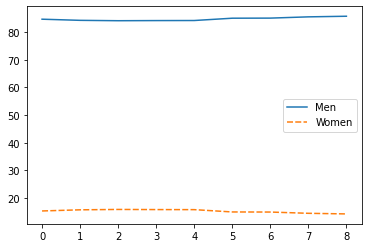

In [58]:
sns.lineplot(data=df[['Men','Women']])

The above plot shows the trends in the cases by men and women over the years